## Import Modules

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import cv2
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

## Execution

#### Get dataset UTK Face

In [2]:
BASE_DIR = '../input/utkface-new/UTKFace/'

# labels - age, gender, ethnicity
image_paths = []
age_labels = []
gender_labels = []
ethnicity_labels = []

for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    try:
        ethnicity = int(temp[2])
    except ValueError:
        ethnicity = -1
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)
    ethnicity_labels.append(ethnicity)
    
df = pd.DataFrame()
df['image'], df['age'], df['gender'], df['ethnicity'] = image_paths, age_labels, gender_labels, ethnicity_labels
df.head()

  0%|          | 0/23708 [00:00<?, ?it/s]

,image,age,gender,ethnicity
0,../input/utkface-new/UTKFace/26_0_2_2017010402...,26,0,2
1,../input/utkface-new/UTKFace/22_1_1_2017011223...,22,1,1
2,../input/utkface-new/UTKFace/21_1_3_2017010500...,21,1,3
3,../input/utkface-new/UTKFace/28_0_0_2017011718...,28,0,0
4,../input/utkface-new/UTKFace/17_1_4_2017010322...,17,1,4


In [3]:
len(df)

23708

In [4]:
df['ethnicity'].value_counts()

ethnicity
 0    10078
 1     4526
 3     3975
 2     3434
 4     1692
-1        3
Name: count, dtype: int64

<Figure size 1200x800 with 0 Axes>

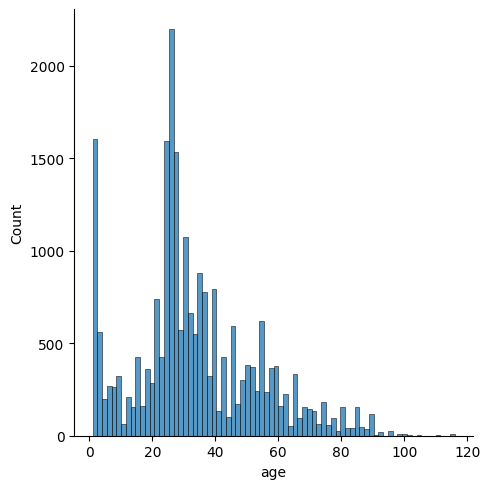

In [5]:
plt.figure(figsize=(12,8))
sns.displot(df,x='age')
plt.show()

<Axes: xlabel='gender', ylabel='count'>

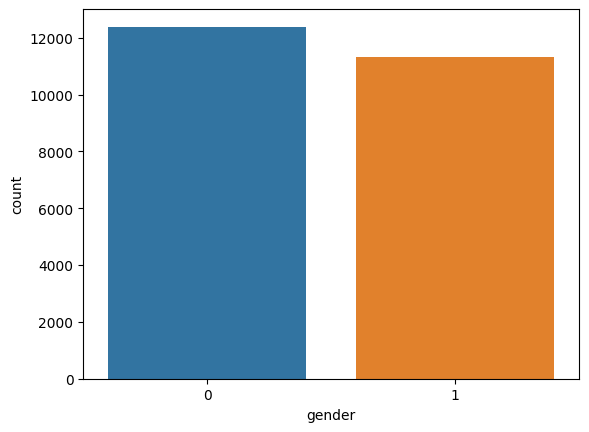

In [6]:
sns.countplot(df, x='gender')

<Axes: xlabel='ethnicity', ylabel='count'>

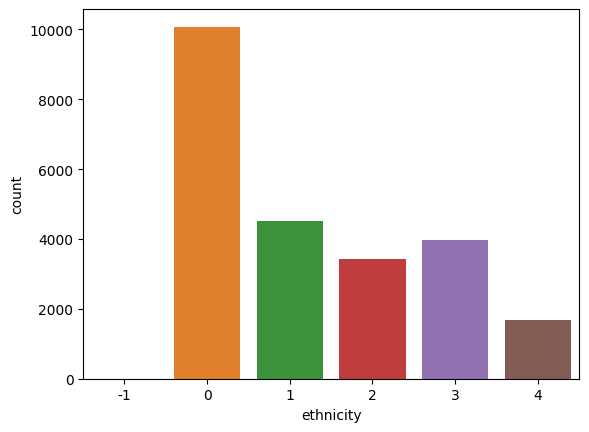

In [7]:
sns.countplot(df, x='ethnicity')

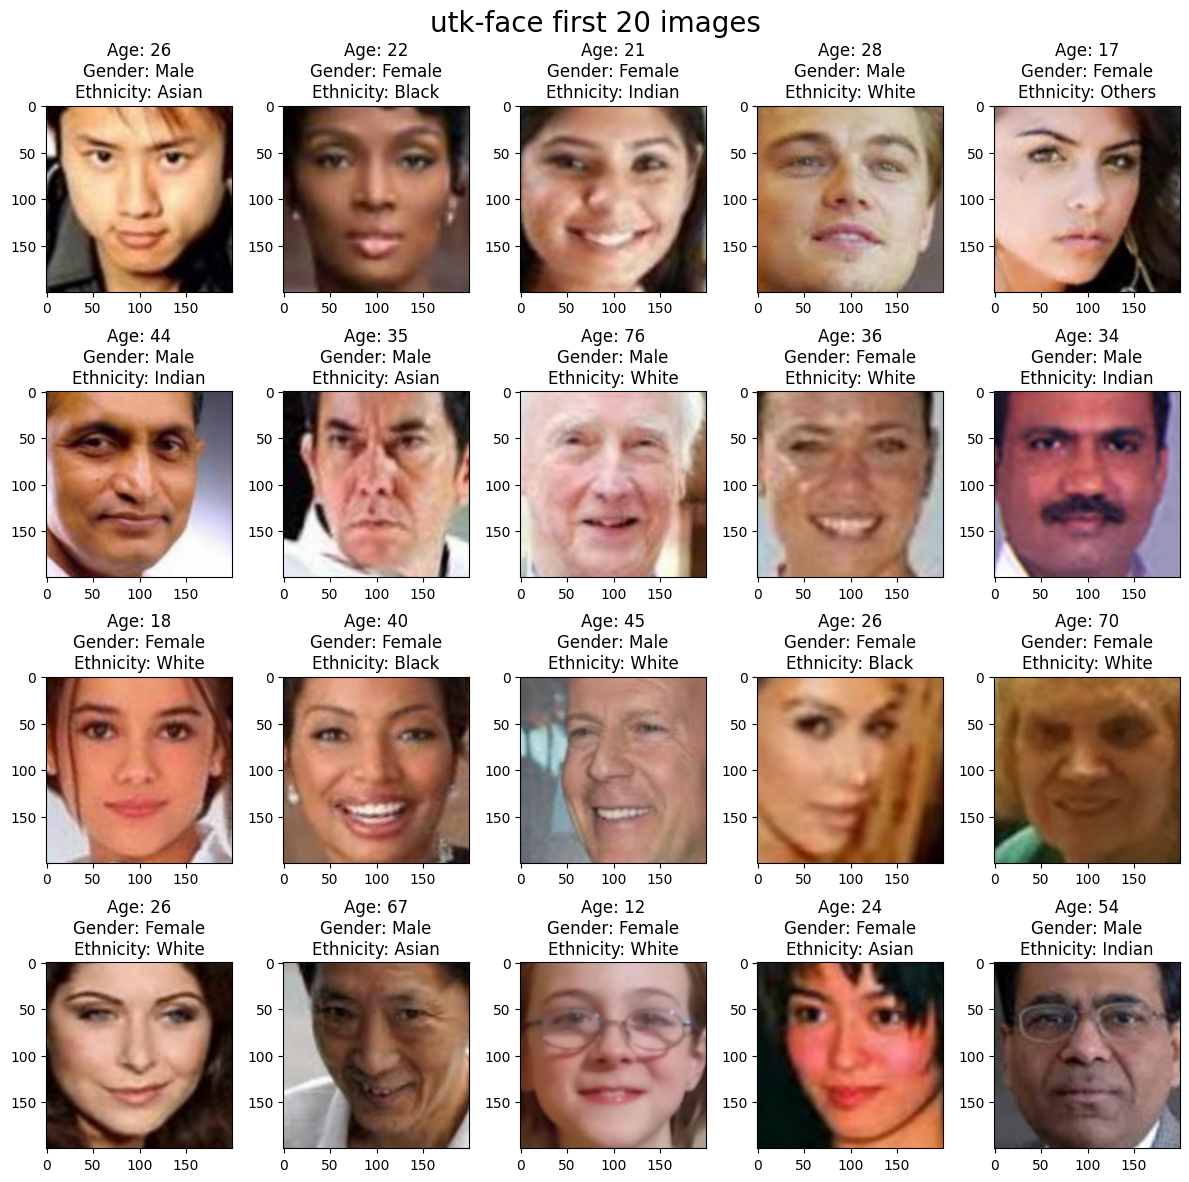

In [8]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(12,12))
gender_dict = ['Male', 'Female']
ethnicity_dict = ['White', 'Black', 'Asian', 'Indian', 'Others', 'Unknown']
for i in range(20):
    image = df['image'][i]
    if type(image) == str:
        import cv2
        image = cv2.imread(image)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[i//5][i%5].imshow(image)
    axes[i//5][i%5].set_title(f"Age: {df['age'][i]}\nGender: {gender_dict[df['gender'][i]]}\nEthnicity: {ethnicity_dict[df['ethnicity'][i]]}")
fig.suptitle('utk-face first 20 images', fontsize = 20)
plt.tight_layout()
plt.show()

#### Get dataset asia afad

In [9]:
BASE_DIR = '../input/asia-afad/AFAD-Full/'
# labels - age, gender, ethnicity
image_paths = []
age_labels = []
gender_labels = []

for age_dir in os.listdir(BASE_DIR):
    if age_dir.isdigit():
        age = int(age_dir)

        for gender_dir in os.listdir(os.path.join(BASE_DIR, age_dir)):
            if gender_dir.isdigit():
                gender = int(gender_dir)

                for image_file in os.listdir(os.path.join(BASE_DIR, age_dir, gender_dir)):
                    if image_file.endswith('.db'):
                        continue
                    image_path = os.path.join(BASE_DIR, age_dir, gender_dir, image_file)
                    image_paths.append(image_path)
                    if(gender == 111):
                        gender_labels.append(0)
                    if(gender == 112):
                        gender_labels.append(1)
                    age_labels.append(age)
    
df2 = pd.DataFrame()
df2['image'], df2['age'], df2['gender'] = image_paths, age_labels, gender_labels
df2.head()

,image,age,gender
0,../input/asia-afad/AFAD-Full/47/112/855927-0.jpg,47,1
1,../input/asia-afad/AFAD-Full/47/112/855705-0.jpg,47,1
2,../input/asia-afad/AFAD-Full/47/112/854778-0.jpg,47,1
3,../input/asia-afad/AFAD-Full/47/112/854588-0.jpg,47,1
4,../input/asia-afad/AFAD-Full/47/112/857962-0.jpg,47,1


In [10]:
len(df2)

165501

<Figure size 1200x800 with 0 Axes>

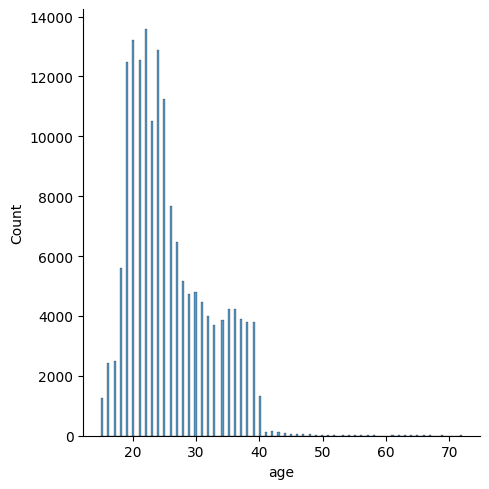

In [11]:
plt.figure(figsize=(12,8))
sns.displot(df2,x='age')
plt.show()

<Axes: xlabel='gender', ylabel='count'>

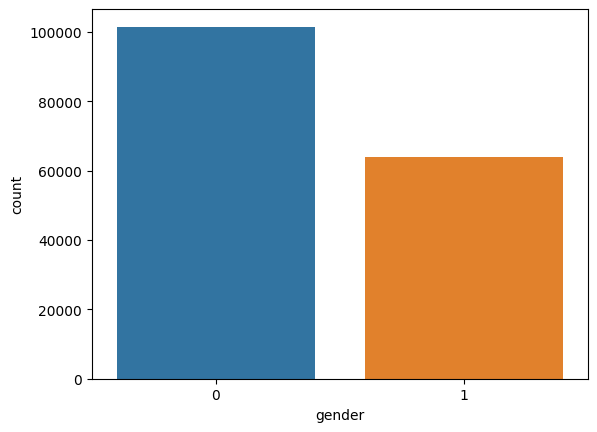

In [12]:
sns.countplot(df2, x='gender')

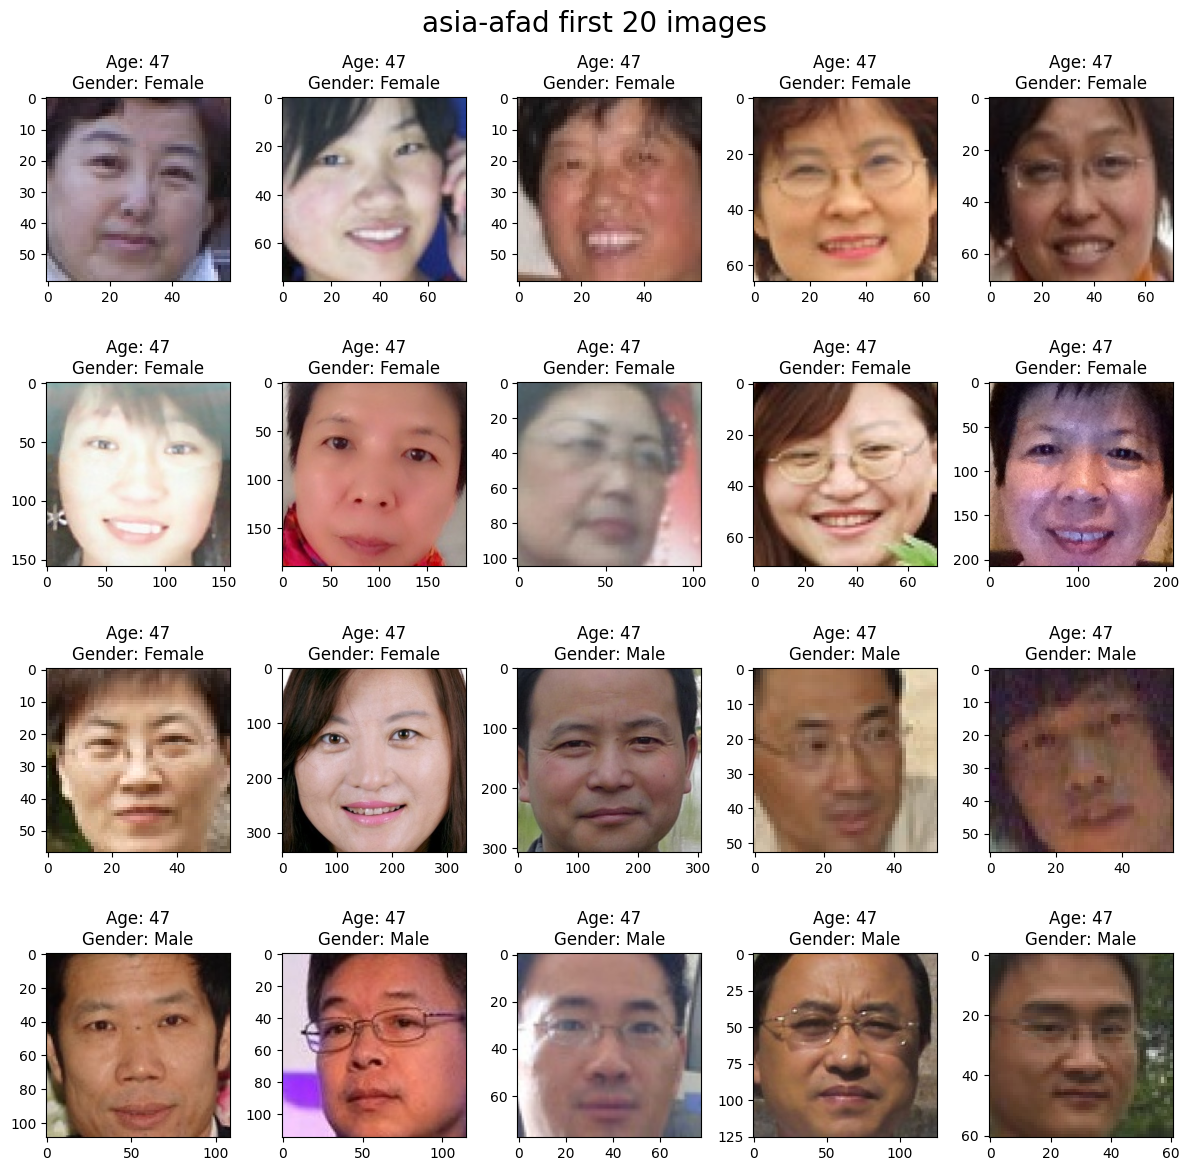

In [13]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(12,12))
gender_dict = ['Male', 'Female']
for i in range(20):
    image = df2['image'][i]
    if type(image) == str:
        import cv2
        image = cv2.imread(image)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[i//5][i%5].imshow(image)
    axes[i//5][i%5].set_title(f"Age: {df2['age'][i]}\nGender: {gender_dict[df2['gender'][i]]}")
fig.suptitle('asia-afad first 20 images', fontsize = 20)
plt.tight_layout()
plt.show()